In [1]:
import torch
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import FunctionTransformer
plt.style.use('dark_background')


torch.Size([6])

graph 1 :
sum of vector 1 : tensor([0., 0., 0., 0.], dtype=torch.float64)
norm of vector 1 : tensor(0., dtype=torch.float64)
number of invertions 0

graph 2 :
sum of vector 2 : tensor([-40.,  40., -40.,  40.], dtype=torch.float64)
norm of vector 2 : tensor(80., dtype=torch.float64)
number of invertions 2

graph 3 :
sum of vector 3 : tensor([ 19., -38.,  19.,  37.], dtype=torch.float64)
norm of vector 3 : tensor(59.4559, dtype=torch.float64)
number of invertions 1


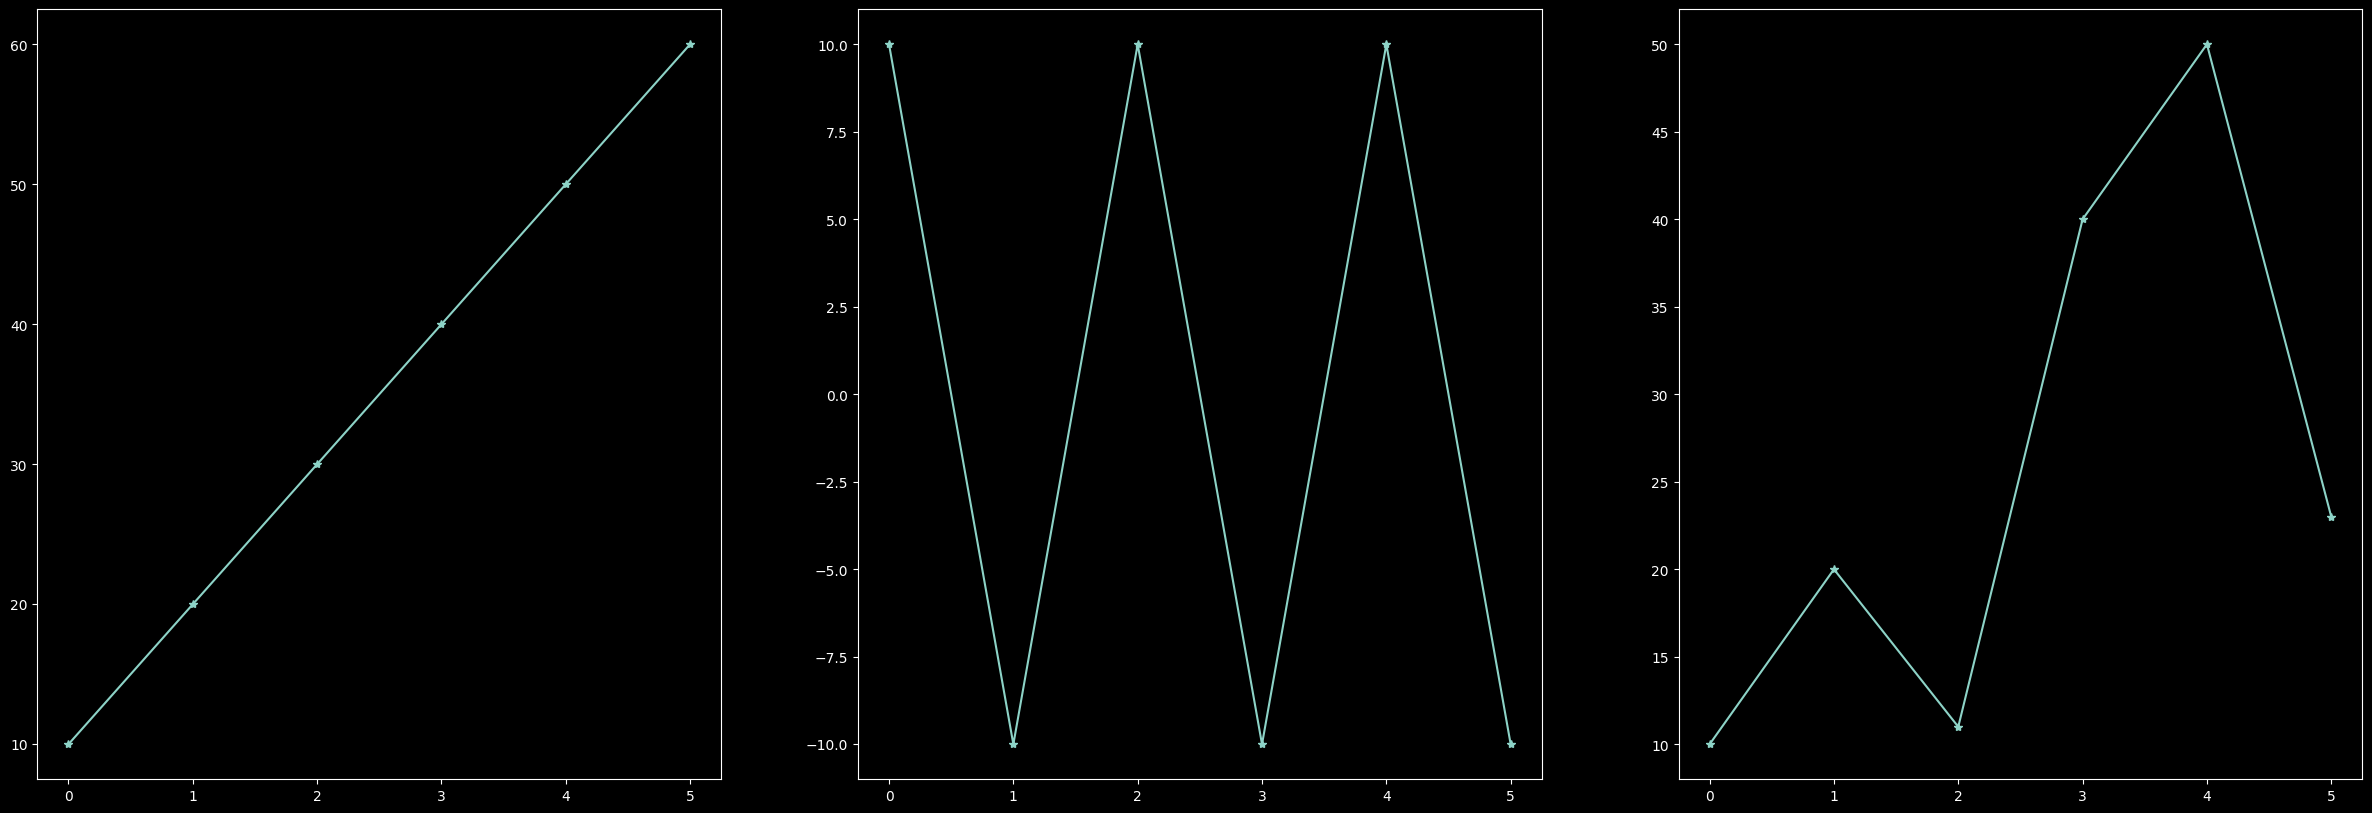

In [2]:

data1 = torch.tensor([10,20,30,40,50,60] ,dtype=torch.float64)
data2 = torch.tensor([10,-10,10,-10,10,-10] ,dtype=torch.float64)
data3 = torch.tensor([10,20,11,40,50,23] ,dtype=torch.float64)
print(data1.shape)

fig,(one,two,three) = plt.subplots(1,3,figsize=(30,10))

one_index = range(len(data1))
one.plot(one_index,data1,marker="*")
two.plot(one_index,data2,marker="*")
three.plot(one_index,data3,marker="*")

mat1 = torch.tensor([
                    [-1,2,-1,0,0,0],
                    [0,-1,2,-1,0,0],
                    [0,0,-1,2,-1,0],
                    [0,0,0,-1,2,-1]
                    ] ,dtype=torch.float64)

res =  mat1*data1
sum = res.sum(dim=1)
Norm = torch.norm(sum)
print()
count=0
for i in sum:
  if i<0:
    count+=1
print('graph 1 :')
print('sum of vector 1 :',sum)
print('norm of vector 1 :',Norm)
print("number of invertions",count)
res =  mat1*data2
sum = res.sum(dim=1)
Norm = torch.norm(sum)
print()
count=0
for i in sum:
  if i<0:
    count+=1
print('graph 2 :')
print('sum of vector 2 :',res.sum(dim=1))
print('norm of vector 2 :',Norm)
print("number of invertions",count)
res =  mat1*data3
sum = res.sum(dim=1)
Norm = torch.norm(sum)
print()
print('graph 3 :')
print('sum of vector 3 :',res.sum(dim=1))
print('norm of vector 3 :',Norm)

count=0
for i in sum:
  if i<0:
    count+=1
print("number of invertions",count)

In [3]:
def compute_rms(x):
    actual = x[:,0]
    predicted = x[:,1]
    rmse = np.sqrt(np.mean(actual-predicted)**2)
    return rmse
rmse_transform = FunctionTransformer(func=compute_rms,validate=True)
x = np.array(
    [[10,20,30,12,32],
    [12,28,18,22,12]]
    )
ans = rmse_transform.transform(x)
print(ans)

13.0


In [4]:
data1 = "./data/histogram_data.csv"
df1 = pd.read_csv(data1,sep=',',header=0)
# df1.head()

data2 = "./data/line_data.csv"
df2 = pd.read_csv(data2,sep=',',header=0)
df2 = df2.iloc[:,1:2]
# df2.head()

data3 = "./data/scatter_data.csv"
df3 = pd.read_csv(data3,sep=',',header=0)
df3 = df3.sort_values('height_cm')
df3 = df3.iloc[:,1:2]
# df3

10
tensor([[-10.,  40., -11.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0., -20.,  22., -40.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0., -11.,  80., -50.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0., -40., 100., -23.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0., -50.,  46., -60.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0., -23., 120., -70.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0., -60., 140., -55.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0., -70., 110., -80.]],
       dtype=torch.float64)

* sums of all the rows  : 
 tensor([ 19., -38.,  19.,  37., -64.,  27.,  25., -40.], dtype=torch.float64)

* no of invetions :  102.88342918079665
no of invertions  3


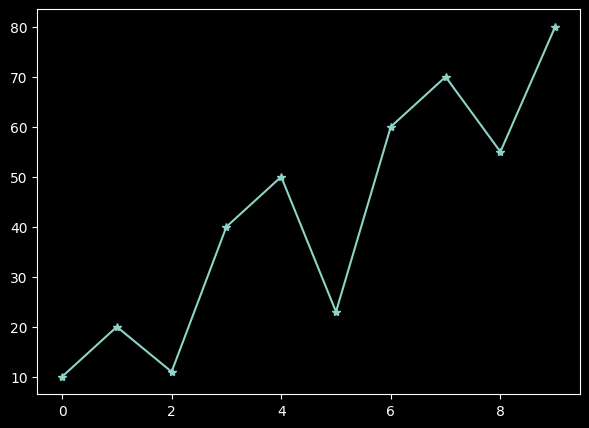

In [5]:
y = torch.tensor([10, 20, 11, 40, 50, 23, 60, 70, 55, 80])
matrix = []
n = len(y)   # number of columns
print(n)
i = 0   # row index

while i < n - 2:   # only 4 rows in your example
    row = [0] * n  # start with zeros

    row[i] = -1        # left element
    row[i+1] = 2       # diagonal element
    row[i+2] = -1      # right element

    matrix.append(row)
    i += 1

matrix = torch.tensor(matrix,dtype= torch.float64)

fig,two = plt.subplots(1,1,figsize=(7,5))
two_index = range(len(y))
two.plot(two_index,y,marker="*")

res =  matrix*y
sum = res.sum(dim=1)
Norm = torch.norm(sum)
print(res)
print()
print('* sums of all the rows  : \n',sum)
print()
print('* no of invetions : ',Norm.item())

count=0
for i in sum:
  if i<0:
    count+=1
print("no of invertions ",count)

In [6]:
matrix1 = []
n = len(df1)   # number of columns
i = 0   # row index

while i < n - 2:   # only 4 rows in your example
    row = [0] * n  # start with zeros

    row[i] = -1        # left element
    row[i+1] = 2       # diagonal element
    row[i+2] = -1      # right element

    matrix1.append(row)
    i += 1

matrix1 = torch.tensor(matrix1,dtype= torch.float64)
#---------------------------------------

matrix2 = []
n = len(df2)   # number of columns
print(n)
i = 0   # row index

while i < n - 2:   # only 4 rows in your example
    row = [0] * n  # start with zeros

    row[i] = -1        # left element
    row[i+1] = 2       # diagonal element
    row[i+2] = -1      # right element

    matrix2.append(row)
    i += 1

matrix2 = torch.tensor(matrix2,dtype= torch.float64)
#---------------------------------------
matrix3 = []
n = len(df3)   # number of columns
i = 0   # row index

while i < n - 2:   # only 4 rows in your example
    row = [0] * n  # start with zeros

    row[i] = -1        # left element
    row[i+1] = 2       # diagonal element
    row[i+2] = -1      # right element

    matrix3.append(row)
    i += 1

matrix3 = torch.tensor(matrix3,dtype= torch.float64)

50


tensor([[-87., 148., -79.,  ...,   0.,   0.,   0.],
        [  0., -74., 158.,  ...,   0.,   0.,   0.],
        [  0.,   0., -79.,  ...,   0.,   0.,   0.],
        ...,
        [  0.,   0.,   0.,  ..., -87.,   0.,   0.],
        [  0.,   0.,   0.,  ..., 174., -71.,   0.],
        [  0.,   0.,   0.,  ..., -87., 142., -74.]], dtype=torch.float64)

* sums of all the rows  : 
 tensor([-18.,  -8.,  17.,  24., -47.,  30., -11.,  -6.,   9., -16.,  20.,  -1.,
         -9.,   4., -12.,  28., -23.,  18.,   5., -49.,  30.,  18., -46.,  67.,
        -52.,  17., -19.,  18.,  12., -15.,  14.,  -1., -27.,  11.,  -6.,  11.,
         16., -16.,   7.,  -3.,  -1., -40.,  62., -26.,   9., -28.,  44., -38.,
         20., -18.,  21.,  -3., -17.,   6.,   9.,  -7.,  13., -13.,   6.,  -6.,
          8.,   4., -28.,  25.,   6., -33.,  35., -24.,   3.,  13., -16.,  34.,
        -41.,  28.,  -9.,  -5.,   1.,  -2.,  16., -33.,  26.,  15., -50.,  26.,
         11.,   6.,  -4., -30.,  36., -32.,  27., -17.,  13., -1

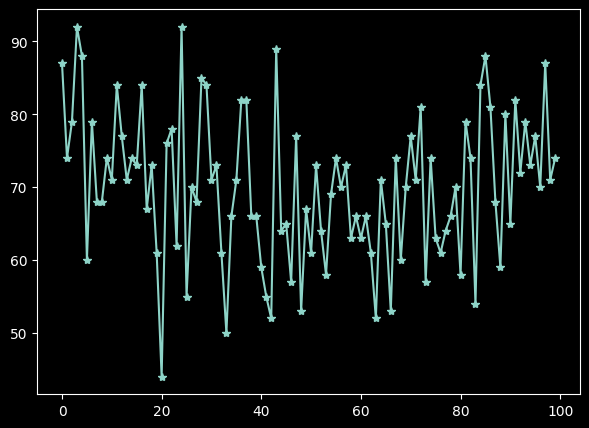

In [7]:
#1st data set


df_1 = df1.iloc[:,0].values
df_1 = torch.tensor(df_1,dtype=torch.float64)
# print(type(df_1))
# print(df_1.shape)
# print(matrix1.shape)

fig,one = plt.subplots(1,1,figsize=(7,5))
one_index = range(len(df1))
one.plot(one_index,df1,marker="*")

res =  matrix1*df_1
sum = res.sum(dim=1)
Norm = torch.norm(sum)
print(res)
print()
print('* sums of all the rows  : \n',sum)
print()
print('* Norm : ',Norm.item())

count=0
for i in sum:
  if i<0:
    count+=1
print("no of invertions ",count)

tensor([[  -3.,   14.,   -2.,  ...,    0.,    0.,    0.],
        [   0.,   -7.,    4.,  ...,    0.,    0.,    0.],
        [   0.,    0.,   -2.,  ...,    0.,    0.,    0.],
        ...,
        [   0.,    0.,    0.,  ...,  -95.,    0.,    0.],
        [   0.,    0.,    0.,  ...,  190., -100.,    0.],
        [   0.,    0.,    0.,  ...,  -95.,  200.,  -97.]], dtype=torch.float64)

* sums of all the rows  : 
 tensor([  9., -10.,  -2.,  12.,  -5.,  -5.,  -1.,   7.,  -8.,   5.,   2.,   3.,
         -4.,  -8.,   5.,   3.,   7., -17.,  17., -15.,  12.,  -2.,  -3.,  -8.,
         14.,  -6.,  -6.,   6.,   5.,  -8.,   9., -13.,  15.,  -9.,   2., -11.,
         16.,  -4.,  -8.,  12.,  -5.,  -6.,   6.,   3.,  -6.,   1.,  -2.,   8.],
       dtype=torch.float64)

* no of invetions :  59.016946718718
no of invertions  25


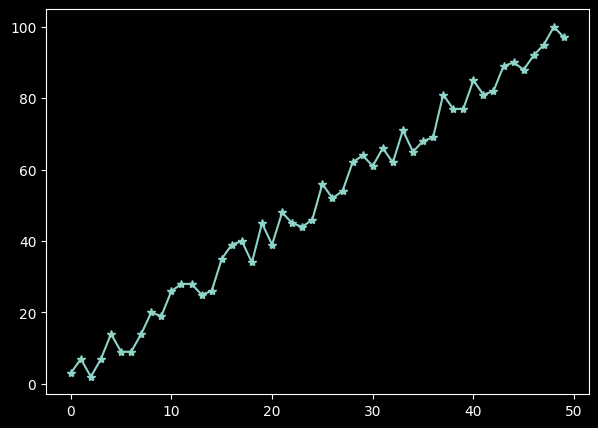

In [8]:
#2nd dataset

import numpy as np

df_2 = torch.tensor(df2.iloc[:,0].values)
# print(df_2.shape)
# print(type(df_2))
# print(df_2)

# print(matrix2.shape)
# print(type(matrix2))
# print(df_2)

fig,two = plt.subplots(1,1,figsize=(7,5))
two_index = range(len(df2))
two.plot(two_index,df2,marker="*")

res =  matrix2*df_2
sum = res.sum(dim=1)
Norm = torch.norm(sum)
print(res)
print()
print('* sums of all the rows  : \n',sum)
print()
print('* no of invetions : ',Norm.item())

count=0
for i in sum:
  if i<0:
    count+=1
print("no of invertions ",count)

tensor([[-83., 170., -67.,  ...,   0.,   0.,   0.],
        [  0., -85., 134.,  ...,   0.,   0.,   0.],
        [  0.,   0., -67.,  ...,   0.,   0.,   0.],
        ...,
        [  0.,   0.,   0.,  ...,  -5.,   0.,   0.],
        [  0.,   0.,   0.,  ...,  10., -98.,   0.],
        [  0.,   0.,   0.,  ...,  -5., 196., -44.]], dtype=torch.float64)

* sums of all the rows  : 
 tensor([  20.,    9.,  -68.,  121., -127.,    5.,  130., -150.,  122., -149.,
         124.,  -63.,   93.,  -83.,    0.,    1.,   25.,   12.,   14.,  -75.,
          18.,   69.,  -23., -104.,  117.,  -61.,   78.,  -61.,  -15.,    5.,
          57.,  -87.,   70.,  -40.,   47.,   -6.,  -56.,   86., -127.,  140.,
         -89.,  -35.,  136.,  -86.,  -21.,   33.,  -46.,   55.,   33., -100.,
          78.,   -3.,  -70.,  118., -118.,   51.,   47.,  -67.,   27.,  -21.,
         -41.,  116.,  -68.,   23.,  -84.,  107.,  -26.,  -22.,  -33.,   19.,
         102., -163.,  114.,  -39.,   68.,  -69.,  -43.,   76.,    4.,  -75.,


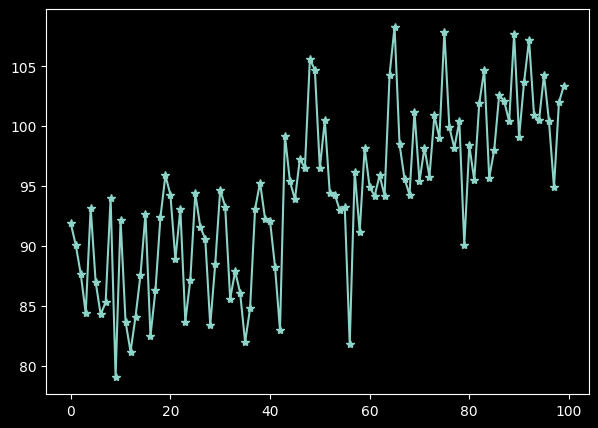

In [9]:
#3st data set
import numpy as np

df_3 = df3.iloc[:,:0]
df_3 = torch.tensor(df_3.index,dtype=torch.float64)

fig,three = plt.subplots(1,1,figsize=(7,5))
three_index = range(len(df3))
three.plot(three_index,df3,marker="*")


res =  matrix3*df_3
sum = res.sum(dim=1)
Norm = torch.norm(sum)
print(res)
print()
print('* sums of all the rows  : \n',sum)
print()
print('* no of invetions : ',Norm.item())

count=0
for i in sum:
  if i<0:
    count+=1
print("no of invertions ",count)

In [10]:

def count_inversions(data: torch.Tensor) -> int:
    # Compute differences between consecutive elements
    diffs = torch.diff(data)

    # Keep only the sign (-1 for decreasing, +1 for increasing, 0 for flat)
    signs = torch.sign(diffs)

    # Remove zeros (no slope change for flat segments)
    non_zero_signs = signs[signs != 0]

    # Count where sign changes
    inversions = torch.sum(non_zero_signs[1:] != non_zero_signs[:-1]).item()

    return inversions


# Test datasets
data1 = torch.tensor([10, 20, 30, 40, 50, 60], dtype=torch.float64)   # strictly increasing
data2 = torch.tensor([10, -10, 10, -10, 10, -10], dtype=torch.float64) # alternating up/down
data3 = torch.tensor([10, 20, 11, 40, 50, 23], dtype=torch.float64)   # mix of up/down

print("Inversions in data1:", count_inversions(data1))  # Expected 0
print("Inversions in data2:", count_inversions(data2))  # Expected 5
print("Inversions in data3:", count_inversions(data3))  # Expected 2


Inversions in data1: 0
Inversions in data2: 4
Inversions in data3: 3


Inversions in data1 at x indices: []
Inversions in data2 at x indices: [2, 3, 4, 5]
Inversions in data3 at x indices: [2, 3, 5]


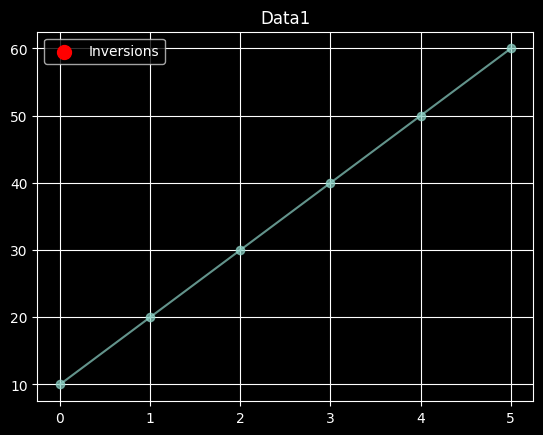

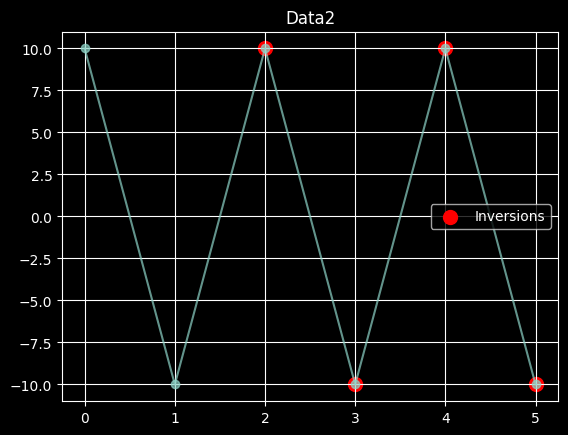

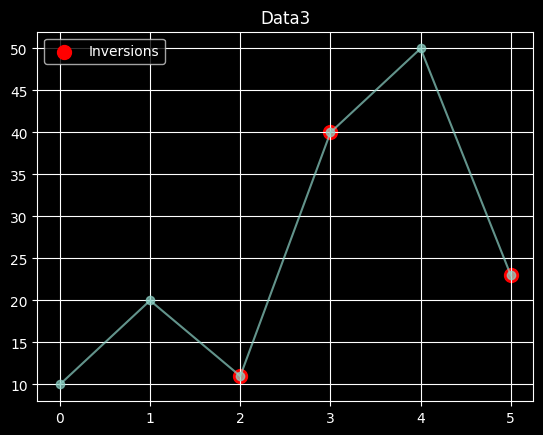

In [11]:


def find_inversions(data: torch.Tensor, x=None):
    # Default x-axis is just indices if not provided
    if x is None:
        x = torch.arange(len(data))

    # Compute differences
    diffs = torch.diff(data)
    signs = torch.sign(diffs)

    # Remove flat segments (0 slope)
    non_zero_indices = torch.where(signs != 0)[0]
    non_zero_signs = signs[non_zero_indices]

    inversions = []
    for i in range(1, len(non_zero_signs)):
        if non_zero_signs[i] != non_zero_signs[i - 1]:
            inv_idx = non_zero_indices[i].item() + 1
            inversions.append(inv_idx)

    return inversions


def plot_with_inversions(data: torch.Tensor, x=None, title=""):
    if x is None:
        x = torch.arange(len(data))

    inversions = find_inversions(data, x)

    plt.plot(x, data, '-o', alpha=0.7)
    plt.scatter([x[i] for i in inversions], [data[i] for i in inversions],
                color="red", s=100, label="Inversions")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()


# Test datasets
data1 = torch.tensor([10, 20, 30, 40, 50, 60], dtype=torch.float64)
data2 = torch.tensor([10, -10, 10, -10, 10, -10], dtype=torch.float64)
data3 = torch.tensor([10, 20, 11, 40, 50, 23], dtype=torch.float64)

# Print inversion indices
print("Inversions in data1 at x indices:", find_inversions(data1))
print("Inversions in data2 at x indices:", find_inversions(data2))
print("Inversions in data3 at x indices:", find_inversions(data3))

# Plot
plot_with_inversions(data1, title="Data1")
plot_with_inversions(data2, title="Data2")
plot_with_inversions(data3, title="Data3")


Intervals in data1: []
Intervals in data2: [(2, 5)]
Intervals in data3: [(2, 3), (5, 5)]


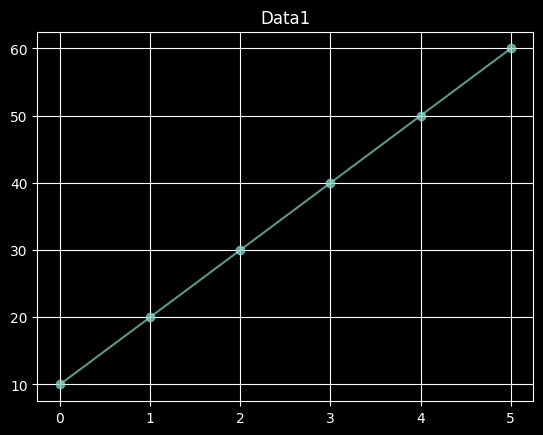

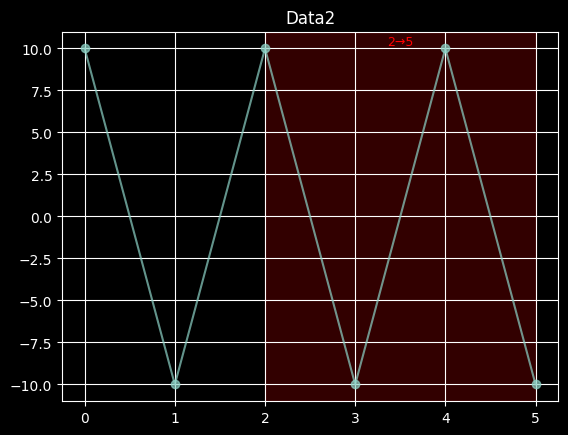

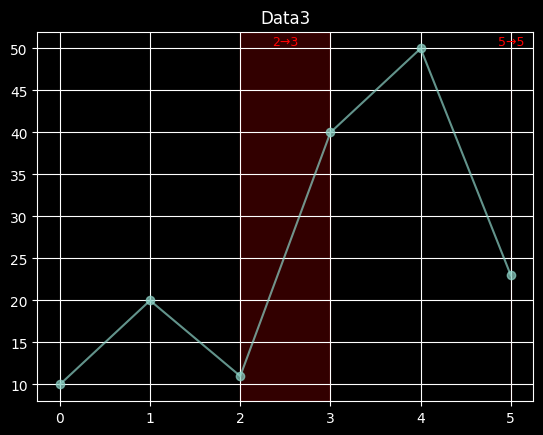

In [12]:


def find_inversion_intervals(data: torch.Tensor, x=None):
    if x is None:
        x = torch.arange(len(data))

    diffs = torch.diff(data)
    signs = torch.sign(diffs)

    non_zero_indices = torch.where(signs != 0)[0]
    non_zero_signs = signs[non_zero_indices]

    inversion_points = []
    for i in range(1, len(non_zero_signs)):
        if non_zero_signs[i] != non_zero_signs[i-1]:
            inv_idx = non_zero_indices[i].item() + 1
            inversion_points.append(inv_idx)

    # Group into intervals
    intervals = []
    if inversion_points:
        start = inversion_points[0]
        prev = inversion_points[0]
        for idx in inversion_points[1:]:
            if idx == prev + 1:
                prev = idx
            else:
                intervals.append((x[start].item(), x[prev].item()))
                start = idx
                prev = idx
        intervals.append((x[start].item(), x[prev].item()))

    return intervals


def plot_with_inversions(data: torch.Tensor, x=None, title=""):
    if x is None:
        x = torch.arange(len(data))

    intervals = find_inversion_intervals(data, x)

    plt.plot(x, data, '-o', alpha=0.7)
    for (start, end) in intervals:
        plt.axvspan(start, end, color='red', alpha=0.2)
        plt.text((start+end)/2, max(data).item(), f"{start}→{end}",
                 ha='center', va='bottom', fontsize=9, color='red')
    plt.title(title)
    plt.grid(True)
    plt.show()


# Test datasets
data1 = torch.tensor([10, 20, 30, 40, 50, 60], dtype=torch.float64)
data2 = torch.tensor([10, -10, 10, -10, 10, -10], dtype=torch.float64)
data3 = torch.tensor([10, 20, 11, 40, 50, 23], dtype=torch.float64)

print("Intervals in data1:", find_inversion_intervals(data1))
print("Intervals in data2:", find_inversion_intervals(data2))
print("Intervals in data3:", find_inversion_intervals(data3))

plot_with_inversions(data1, title="Data1")
plot_with_inversions(data2, title="Data2")
plot_with_inversions(data3, title="Data3")


In [13]:
import torch
import pandas as pd
import matplotlib.pyplot as plt

def find_inversion_intervals(data: torch.Tensor, x=None):
    if x is None:
        x = torch.arange(len(data))

    diffs = torch.diff(data)
    signs = torch.sign(diffs)

    non_zero_indices = torch.where(signs != 0)[0]
    non_zero_signs = signs[non_zero_indices]

    inversion_points = []
    for i in range(1, len(non_zero_signs)):
        if non_zero_signs[i] != non_zero_signs[i-1]:
            inv_idx = non_zero_indices[i].item() + 1
            inversion_points.append(inv_idx)

    # Group into intervals
    intervals = []
    if inversion_points:
        start = inversion_points[0]
        prev = inversion_points[0]
        for idx in inversion_points[1:]:
            if idx == prev + 1:
                prev = idx
            else:
                intervals.append((x[start].item(), x[prev].item()))
                start = idx
                prev = idx
        intervals.append((x[start].item(), x[prev].item()))

    return intervals


def comment_on_data(intervals):
    if not intervals:
        return "The graph shows a consistent trend without inversions."
    elif len(intervals) == 1:
        return f"The graph has one inversion range from {intervals[0][0]} to {intervals[0][1]}."
    else:
        return f"The graph shows {len(intervals)} inversion ranges: " + \
               ", ".join([f"{s}→{e}" for s, e in intervals])


def analyze_csv(filepath, x_col=None, y_col=None):
    # Load CSV
    df = pd.read_csv(filepath)

    # If columns are not specified, take first two
    if x_col is None:
        x_col = df.columns[0]
    if y_col is None:
        y_col = df.columns[1]

    x = torch.tensor(df[x_col].values, dtype=torch.float64)
    y = torch.tensor(df[y_col].values, dtype=torch.float64)

    # Find inversions
    intervals = find_inversion_intervals(y, x)

    # Comment
    analysis_comment = comment_on_data(intervals)

    # Plot
    plt.plot(x, y, '-o', alpha=0.7, label="Data")
    for (start, end) in intervals:
        plt.axvspan(start, end, color='red', alpha=0.2)
        plt.text((start+end)/2, max(y).item(), f"{start}→{end}",
                 ha='center', va='bottom', fontsize=9, color='red')
    plt.title("CSV Data with Inversions Highlighted")
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.legend()
    plt.grid(True)
    plt.show()

    return analysis_comment

import pandas as pd
data1 = "./data/histogram_data.csv"
df1 = pd.read_csv(data1,sep=',',header=0)
# df1.head()

data2 = "./data/line_data.csv"
df2 = pd.read_csv(data2,sep=',',header=0)
df2 = df2.iloc[:,1:2]
# df2.head()

data3 = "./data/scatter_data.csv"
df3 = pd.read_csv(data3,sep=',',header=0)
df3 = df3.sort_values('height_cm')
df3 = df3.iloc[:,1:2]
# df3
# Example usage:
# comment = analyze_csv(data1, x_col="Time", y_col="Value")
# print(comment)


In [14]:


def find_inversion_intervals(data: torch.Tensor, x=None):
    if x is None:
        x = torch.arange(len(data))

    diffs = torch.diff(data)
    signs = torch.sign(diffs)

    non_zero_indices = torch.where(signs != 0)[0]
    non_zero_signs = signs[non_zero_indices]

    inversion_points = []
    for i in range(1, len(non_zero_signs)):
        if non_zero_signs[i] != non_zero_signs[i-1]:
            inv_idx = non_zero_indices[i].item() + 1
            inversion_points.append(inv_idx)

    # Group into intervals
    intervals = []
    if inversion_points:
        start = inversion_points[0]
        prev = inversion_points[0]
        for idx in inversion_points[1:]:
            if idx == prev + 1:
                prev = idx
            else:
                intervals.append((x[start].item(), x[prev].item()))
                start = idx
                prev = idx
        intervals.append((x[start].item(), x[prev].item()))

    return intervals


def comment_on_data(intervals):
    if not intervals:
        return "The graph shows a consistent trend without inversions."
    elif len(intervals) == 1:
        return f"The graph has one inversion range from {intervals[0][0]} to {intervals[0][1]}."
    else:
        return f"The graph shows {len(intervals)} inversion ranges: " + \
               ", ".join([f"{s}→{e}" for s, e in intervals])


def analyze_csv(filepath, x_col=None, y_col=None):
    # Load CSV
    df = pd.read_csv(filepath)

    # If columns are not specified, take first two
    if x_col is None:
        x_col = df.columns[0]
    if y_col is None:
        y_col = df.columns[1]

    x = torch.tensor(df[x_col].values, dtype=torch.float64)
    y = torch.tensor(df[y_col].values, dtype=torch.float64)

    # Find inversions
    intervals = find_inversion_intervals(y, x)

    # Comment
    analysis_comment = comment_on_data(intervals)

    # Plot
    plt.plot(x, y, '-o', alpha=0.7, label="Data")
    for (start, end) in intervals:
        plt.axvspan(start, end, color='red', alpha=0.2)
        plt.text((start+end)/2, max(y).item(), f"{start}→{end}",
                 ha='center', va='bottom', fontsize=9, color='red')
    plt.title("CSV Data with Inversions Highlighted")
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.legend()
    plt.grid(True)
    plt.show()

    return analysis_comment


# Run on your uploaded file
comment = analyze_csv("/mnt/data/histogram.csv")
print(comment)


FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/histogram.csv'